In [34]:
import pandas as pd
import numpy as np

dataset=pd.read_csv("Mall_Customers.csv")

X=dataset.iloc[:,1:4].values
y=dataset.iloc[:,4].values.reshape(-1,1)
#print("X",X)
#print("Y",y)

from sklearn.impute import SimpleImputer

## taking mean
imputer=SimpleImputer(missing_values=np.nan,strategy="median") # we can use most_frequent or median or mean
imputer.fit(X[:,1:4])
X[:,1:4]=imputer.transform(X[:,1:4])
#print("Simple Imputer",X)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct=ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[0])],remainder="passthrough")
X=np.array(ct.fit_transform(X))
#print("One hot Encoding",X)

from sklearn.preprocessing import MinMaxScaler #it scales value between 0 and 1
norm=MinMaxScaler()
X=norm.fit_transform(X)
#print(X)

normy=MinMaxScaler()
y=norm.fit_transform(y)
#print("Y",y)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred) 
print(cm)

d:\extra\software\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ValueError: Unknown label type: 'continuous'

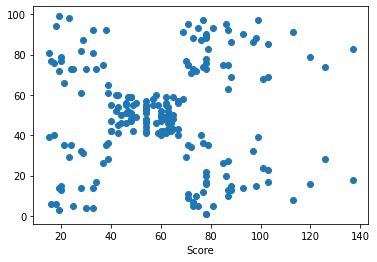

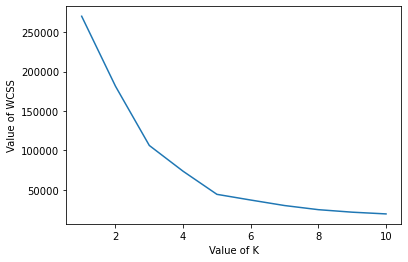

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 0 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


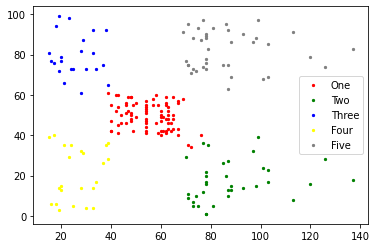

In [44]:
#sir program
import matplotlib.pyplot as plt
X_Orignal=dataset.iloc[:,[3,4]].values
X=dataset.iloc[:,3].values
X=X.reshape(-1,1)
y=dataset.iloc[:,4].values
plt.scatter(X,y)
plt.xlabel("Salary")
plt.xlabel("Score")
plt.show()






from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i)
    kmean.fit(dataset.iloc[:,[3,4]].values)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xlabel("Value of K")
plt.ylabel("Value of WCSS")
plt.show()






kmeans=KMeans(n_clusters=5)
y_means=kmeans.fit_predict(X_Orignal)
print(y_means)





plt.scatter(X_Orignal[y_means==0,0],X_Orignal[y_means==0,1],s=5,c="red",label="One")
plt.scatter(X_Orignal[y_means==1,0],X_Orignal[y_means==1,1],s=5,c="green",label="Two")
plt.scatter(X_Orignal[y_means==2,0],X_Orignal[y_means==2,1],s=5,c="blue",label="Three")
plt.scatter(X_Orignal[y_means==3,0],X_Orignal[y_means==3,1],s=5,c="yellow",label="Four")
plt.scatter(X_Orignal[y_means==4,0],X_Orignal[y_means==4,1],s=5,c="grey",label="Five")
plt.legend()
plt.show()


In [ ]:
dataset